In [1]:
import math
import random
import time

import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
ROBOT_L = 0.14
ROBOT_W = 0.16
WHEEL_R = 0.065/2

In [10]:
def simulate(x0, commands, dt, f, timeEnd = 10, plotPeriod = 0.5, xlim=[-5,5], ylim=[-5,5]):
    
    fig = plt.figure()
    plt.show(block=False)
    fig.canvas.draw()
    
    curTime = 0
    x = x0
    commandIndex = 0
    commandTime = 0
    curCommand = np.array([[0.0], [0.0]])
    
    lastPlot = 0
    
    while curTime < timeEnd:
        
        if(commandIndex < len(commands)):
            commandDelay, curCommand = commands[commandIndex]
            if(curTime - commandTime >= commandDelay):
                commandIndex += 1
                commandTime = curTime
        
        x = f(x, curCommand, dt)
        
        
        
        if(curTime - lastPlot >= plotPeriod):
            
            fig.clear()
            
            currentPos = np.array([[x[0,0], x[3,0]]])
            plt.scatter(currentPos[:,0], currentPos[:,1])

            plt.quiver([currentPos[0,0]], [currentPos[0,1]], [math.cos(x[6,0])], [math.sin(x[6,0])])
            
            velocity = np.array([[x[1,0], x[4,0]]])
            if(np.linalg.norm(velocity) > 1e-3):
                plt.quiver([currentPos[0,0]], [currentPos[0,1]], velocity[:,0], velocity[:,1], scale=1)
            
            plt.xlim(xlim)
            plt.ylim(ylim)
            plt.grid()
            
            #plt.gca().clear()
            fig.canvas.draw()
            plt.pause(0.01)
            #plt.show()
            lastPlot = curTime
        else:
            time.sleep(0.01)
        #print(f"[{curTime}]\n{x}")
        #plt.clear()
        #plt.show()
        
        #if(curTime > 0.60):
        #    break
        
        curTime += dt
        
    print(x)
    

In [29]:
def f(xn, un1, dt):
    k = 0.1
    dt2 = dt*dt
    xn1 = np.array([
        [xn[0,0] + xn[1,0] * dt + 0.5 * xn[2,0] * dt2],
        [xn[1,0] + xn[2,0] * dt],
        [k*(un1[0,0]*math.cos(xn[6,0] + un1[1,0]) - xn[1,0]) / dt],
        [xn[3,0] + xn[4,0] * dt + 0.5 * xn[5,0] * dt2],
        [xn[4,0] + xn[5,0] * dt],
        [k*(un1[0,0]*math.sin(xn[6,0] + un1[1,0]) - xn[4,0]) / dt],
        [xn[6,0] + xn[7,0] * dt],
        [math.tan(un1[1,0]) * (xn[1,0]*math.cos(xn[6,0]) + xn[4,0]*math.sin(xn[6,0])) / ROBOT_L]
    ])
    return xn1
    

In [30]:
dt = 0.01

In [52]:
commands = [
    #(0.1, np.array([[0.0], [0.0]])),
    #(2, np.array(([0.7],[0.0]))),
    #(1, np.array([[0.0], [0.0]])),
    #(7, np.array([[1.0], [0.1391]])),
    #(5*math.pi/2, np.array([[0.2], [math.atan(0.14/1)]])),
    #(5, np.array([[0.2], [0.0]])),
    (math.pi/10, np.array([[1], [math.atan(0.14/0.2)]])),
    (0.1, np.array([[0.0], [0.0]]))
]

In [55]:
x0 = np.array([
    [0.0],
    [1.0],
    [0.0],
    [0.0],
    [0.0],
    [0.0],
    [0.0],
    [0.0],
])

<IPython.core.display.Javascript object>


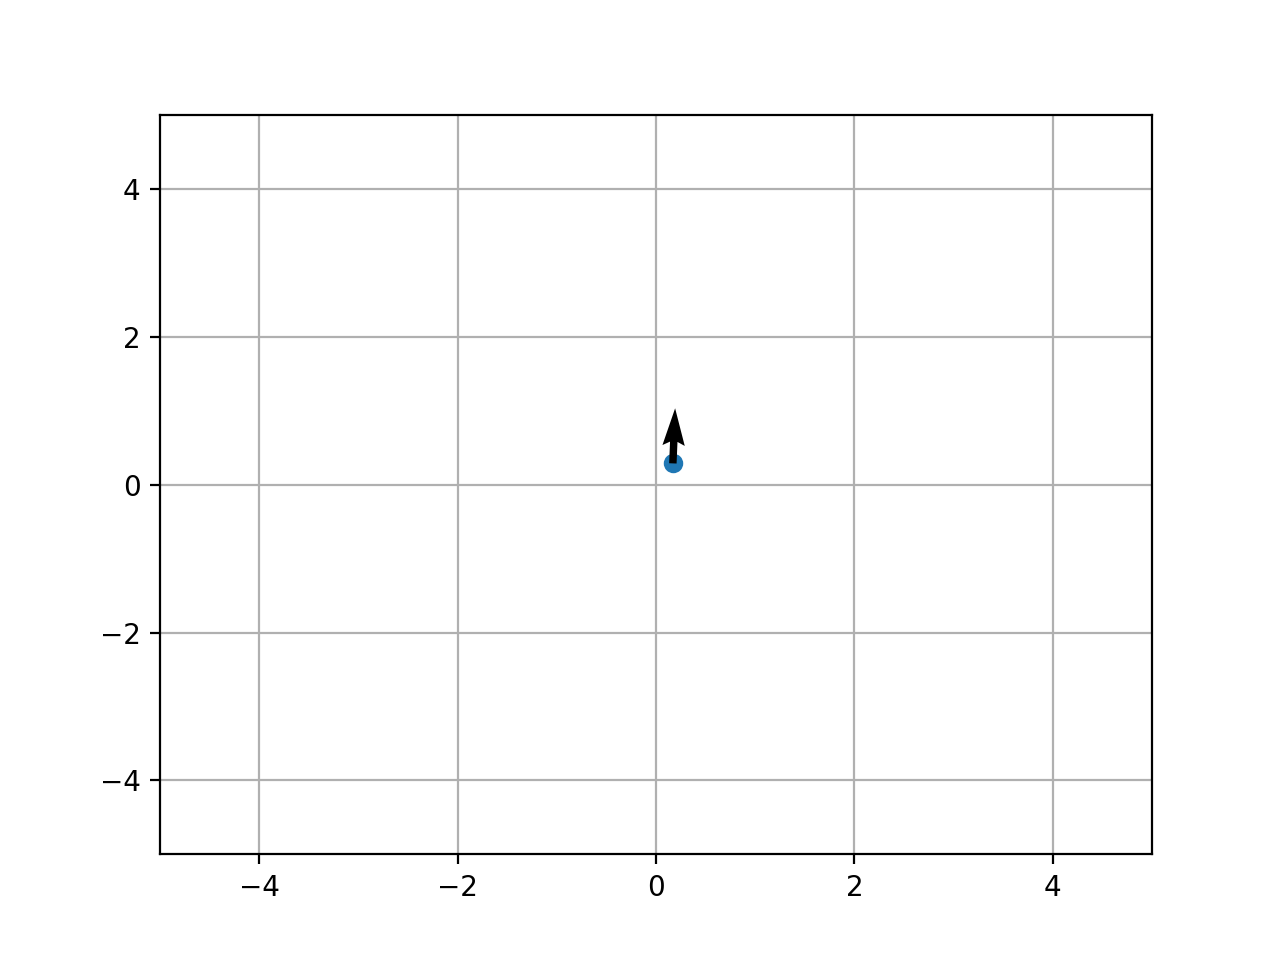

[[ 1.70135102e-01]
 [-7.71815873e-52]
 [ 8.69849343e-51]
 [ 2.89754487e-01]
 [ 5.69000749e-51]
 [-6.41273320e-50]
 [ 1.53023754e+00]
 [ 0.00000000e+00]]


In [56]:
simulate(x0, commands, dt, f, timeEnd = 10)

In [9]:
x0.shape

(8, 1)

In [10]:
commands[0][1].shape

(2, 1)

In [11]:
x0[:,0]

array([0., 0., 0., 0., 0., 0., 0., 0.])